# Objective:-Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
data=pd.read_csv("D://Data sets//Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [6]:
#We will take high sales above at 7.49 beacause it is the average of sales
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [9]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int32
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

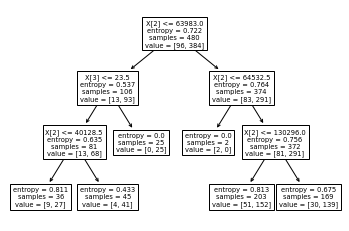

In [13]:
#PLot the decision tree
tree.plot_tree(model);

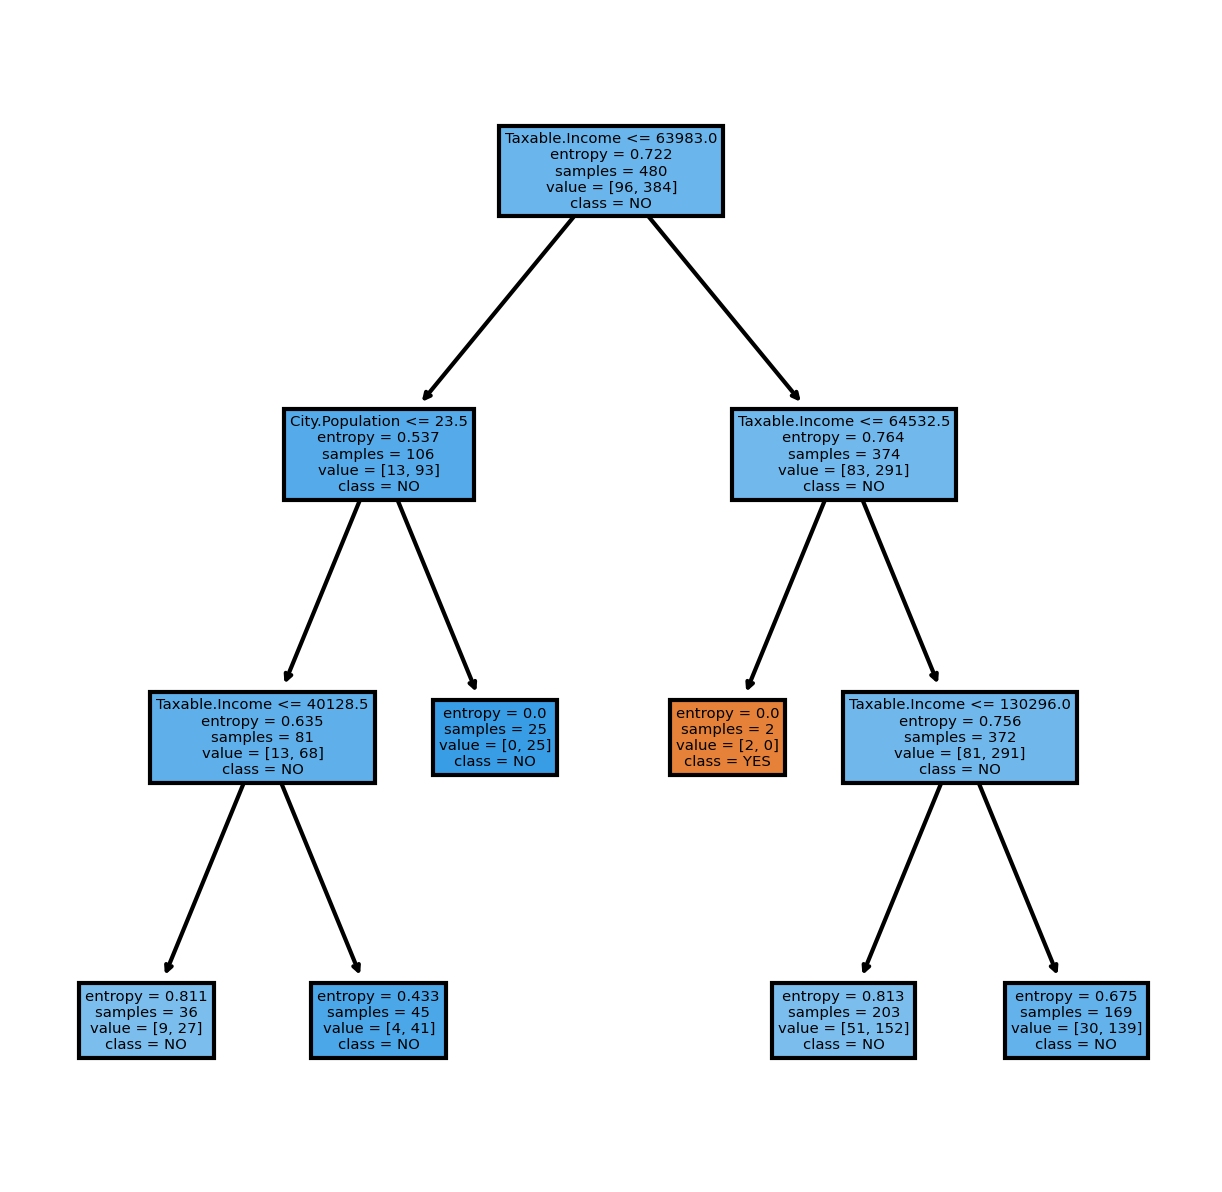

In [14]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [15]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8041666666666667

In [16]:

model.score(x_test, y_test)

0.7666666666666667

In [17]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [18]:
y_pred = model.predict(x_test)

In [19]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.25123153, 0.74876847],
       [0.17751479, 0.82248521],
       [0.25123153, 0.74876847],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25123153, 0.74876847],
       [0.08888889, 0.91111111],
       [0.08888889, 0.91111111],
       [0.17751479, 0.82248521],
       [0.25      , 0.75      ],
       [0.17751479, 0.82248521],
       [0.08888889, 0.91111111],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.17751479, 0.82248521],
       [0.25123153, 0.74876847],
       [0.25      , 0.75      ],
       [0.25123153, 0.74876847],
       [0.08888889, 0.91111111],
       [0.08888889, 0.91111111],
       [0.25123153, 0.74876847],
       [0.25123153, 0.74876847],
       [0.25123153, 0.74876847],
       [0.        , 1.        ],
       [0.25123153, 0.74876847],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [20]:

# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 0, 28],
       [ 0, 92]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7666666666666667')

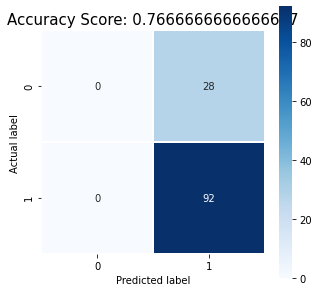

In [21]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [22]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [24]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.800000,0.766667
1,2,0.804167,0.766667
2,3,0.804167,0.766667
3,4,0.810417,0.758333
4,5,0.822917,0.775000
5,6,0.831250,0.750000
6,7,0.841667,0.733333
7,8,0.854167,0.733333
8,9,0.866667,0.725000
9,10,0.875000,0.733333


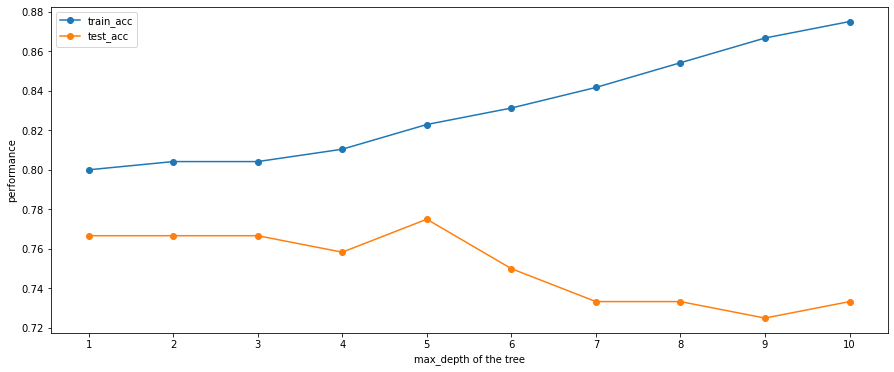

In [25]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_acc'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [26]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [29]:
X=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
#Find the accuracy
model.score(X_test,y_test)

-0.8405228758169934

# Conclusion:-We can see maximum depth of tree 5 is good as accuracy prospective & classsification is good technique for predict the sale & regression is not usual to good at this dataset